In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. 

You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. 

Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. 

Here are the steps to complete it:

Load the dataset ../data/housing-data.csv

plot the histograms for each feature

create 2 variables called X and y: 

    X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
    
create a linear regression model in Keras with the appropriate number of inputs and output

split the data into train and test with a 20% test size

train the model on the training set and check its accuracy on training and test set

how's your model doing? Is the loss growing smaller?

try to improve your model with these experiments:

normalize the input features with one of the rescaling techniques mentioned above

use a different value for the learning rate of your model

use a different optimizer

once you're satisfied with training, check the R2score on the test set


In [4]:
df = pd.read_csv("../data/housing-data.csv")
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [5]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


[]

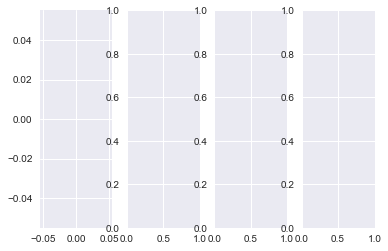

In [23]:
#df['sqft'].plot(kind='hist', bins=8,figsize=(8,6))
f, ax = plt.subplots(1,4, sharex=False, sharey=False)
ax[0].plot()